<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Mariana Briones Martínez y Jesus Alvarez Castellanos

**Fecha:** 05 de marzo del 2020.

**Expediente** : IF715305 y IF714552
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

In [2]:
from scipy import optimize
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


El máximo de f es: [1.875]


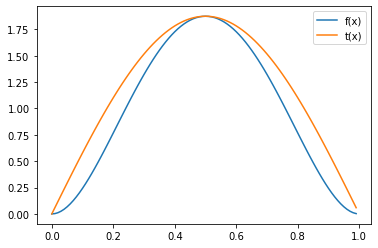

In [3]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(np.pi*x) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

$$g(x)=\frac{t(x)}{c}$$
donde
$$c=\int_{-\infty}^{\infty}t(x)dx$$
Primero obtenemos
$$ \int_a^bt(x)dx$$
donde a=0 y b=1 debido a que esos límites de la función en la gráfica
$$\int_0^1t(x)dx=\int_0^1a\sin{\pi x}=\frac{-a}{\pi}\cos{\pi x}\Big|_0^1=\frac{-a}{\pi}(\cos{\pi}-\cos{0})=\frac{2a}{\pi}$$
$$g(x)=\frac{a\sin{\pi x}}{\frac{2a}{\pi}}$$
$$g(x)=\frac{\pi\sin{\pi x}}{2}$$

Encontrar $G(x)$ que corresponde a la distancia acomulada
$$G(x)= \int_0^x {\pi\sin(\pi x)\over 2}={- \cos(\pi x)\over 2 }\Big|_0^x\ ={- \cos(\pi x)\over 2  }+{1\over2}$$
igualamos $G(x)$ a $U$ 
$$U = {- \cos(\pi x)\over 2  }+{1\over2}$$

$$2U = - \cos(\pi x) + 1$$

$$- \cos(2U -1) = \pi x$$

$$x = {\cos^{-1} (2U -1)\over\pi}$$

Este valor corresponde a $R_2$ que sigue una distribucion g(x)

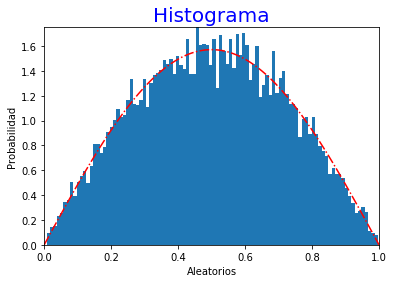

In [5]:
# Función t -> Función constante
#t = lambda x: max_f*np.sin(np.pi*x) # función constante

#x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
#print('El máximo de f es:',max_f)
# Gráficas de las funciones
#plt.plot(x,f(x),label='f(x)')
#plt.plot(x,t(x),label='t(x)')
#plt.legend()
# definir la fincion a uilizar
def puntosdist(N):
    return np.arccos(1-2*np.random.random(N))/np.pi
N = 10**4
x= np.arange(0,N,0.01)
deriv = (np.pi/2)*np.sin(np.pi*x)
x2 = puntosdist(N)
#Creación del histograma
plt.plot(x,deriv, 'r-.')
plt.title('Histograma',size = "20",color = "b")
plt.axis([0,1,0,1.75])
plt.hist(x2,bins=100,density=True)
plt.xlabel('Aleatorios')
plt.ylabel('Probabilidad')
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

El máximo de f es: [1.875]


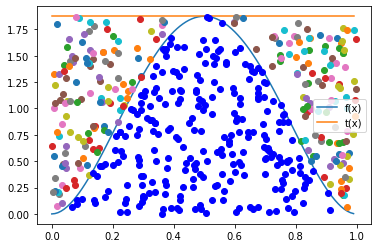

Porcentaje: 0.516


In [14]:

# N= puntos aleatorios
N = 500  

def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') 
     for i in range (len(R1))]
    Numero = np.sum([1 if condition[i] else 0 for i in range (len(R1))])
    plt.show()
    return Numero/500

#Constante 
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.ones(len(x)) # función constante
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

print("Porcentaje:",Acep_rechazo(R2,R1,f,t))


6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

El máximo de la función es: 1.875


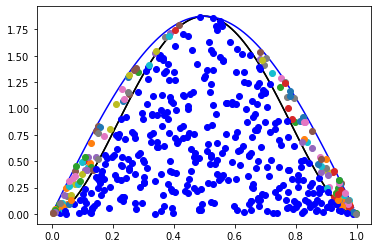

Porcentaje: 0.704


In [10]:
# Función objetivo
def obj(x): return 30*(x**2-2*x**3+x**4)
x = np.arange(0,1,0.01)
plt.plot(x,obj(x),'k')
# Encuentro el máximo de la función obj
c = float(obj(optimize.fmin(lambda x:-obj(x),0,disp=False)))
print('El máximo de la función es:',c)

t = lambda x: c*np.sin(np.pi * x)
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)
print("Porcentaje:",Acep_rechazo(R2,R1,f,t))


la diferencia es que con la senidal el porcentaje de numeros estuvieron dentro del rango fue mayor por un 10%, lo que quiere decir que se asemejo más a la función y por lo tanto es más acertada.

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de f es: [1.875]


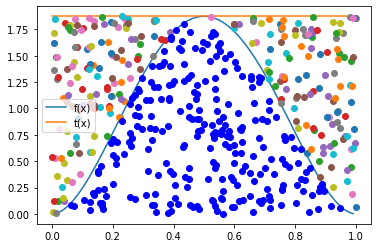

Porcentaje: 0.506


In [11]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    r1 = [R1[i] if condition[i] else False for i in range (len(R1))]
    return r1

El máximo de la función es: 2.109375


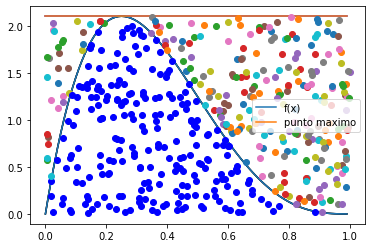

TypeError: 'numpy.float64' object is not iterable

In [15]:
N = 500  # número de puntos
# Función objetivo
f = lambda x: 20*x*((1-x)**3)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),'k')
# Encuentro el máximo de la función f
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print('El máximo de la función es:',c)

t = lambda x: c*np.ones(len(x))
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='punto maximo')
plt.legend()

r = Acep_rechazo(R2,R1,f,t)
r = list(filter(lambda x: x != False,r))

plt.hist(r,10,(x.min(0),x.max(1)),density = True)

plt.show()